##  Radon Transform

Classical x-ray imaging devices send x-ray beams through a body and display the mean density along the entire path of the ray. A mathematical description of the imaging process is then given by the Radon transform as below;

If $f:\mathbb R^2\to\mathbb R$ , the **Radon transform** (RT) $Rf$ is defined as line integral $$Rf(L)=\int_Lf(\mathbf x)d\mathbf x.$$

The line $L$ can be parameterized by its distance $s$ to the origin and the angle $\alpha$ that $L$ makes with the $y$ axis.So we have parametrization of the line by multiplying matrix and vector:
$$\begin{pmatrix}x(z)\\y(z) \end{pmatrix} = \begin{pmatrix}\cos \alpha& -\sin \alpha\\ \sin \alpha & \cos \alpha \end{pmatrix}\begin{pmatrix}s\\z \end{pmatrix} = \begin{pmatrix}s \cos \alpha - z\sin \alpha\\s \sin \alpha + z\cos \alpha \end{pmatrix}$$
Then $$Rf(\alpha, s) = \int_{\begin{pmatrix}x\\y \end{pmatrix}\begin{pmatrix}\cos \alpha\\ \sin \alpha \end{pmatrix}=s} f (x,y)dr = \int_{-\infty}^\infty f(s\cos\alpha-z\sin\alpha, s\sin\alpha+z\cos\alpha) dz.$$ 

$$$$

![Radon_transform](Radon_transform.png)

Here, $s$ may be negative. The line $(\alpha, s)$ is identical to the line $(\alpha+\pi, -s)$.

### Direct Radon Transform

In [1]:
from skimage.io import imread
from skimage.transform import resize, rotate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# image resolution
N = 1024
num_images = 2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


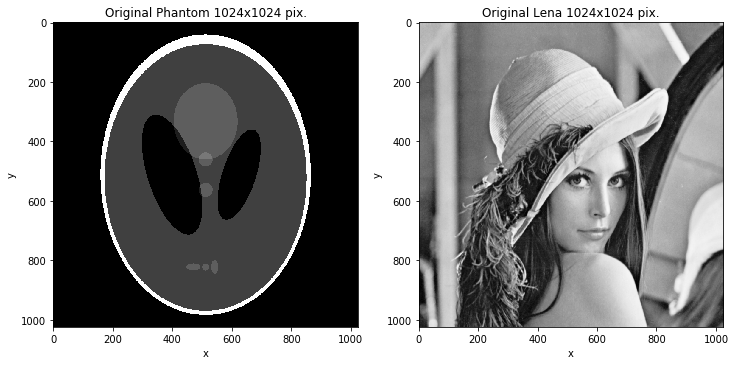

In [248]:
plt.figure(figsize=(12, 6))

# list to store all images to be observed (global variable)
list_of_images = list()

for i in range(num_images):
    plt.subplot(1, 2, i+1)
    if i == 0:
        # rescale to the interval [0,1]
        list_of_images.append(imread('/Users/drew/Desktop/Shepp_logan.png', as_grey=True) / 255.0)
    elif i == 1:
        list_of_images.append(np.zeros((N, N)))
        # not necessary to resize in this case
        size = 1024
        # resize to (size * size)
        im = resize(imread('/Users/drew/Desktop/lena.png', as_grey=True) / 255.0, (size, size))
        list_of_images[-1][ (N - size) // 2:(N - size) // 2 + size,
                            (N - size) // 2:(N - size) // 2 + size  ] = im

    # check, that the current downloading image has correct shape
    assert list_of_images[-1].shape == (N, N)

    plt.imshow(list_of_images[-1], cmap=plt.cm.Greys_r)
    if i == 0:
        plt.title('Original Phantom 1024x1024 pix.')
        plt.xlabel('x')
        plt.ylabel('y')
    elif i == 1:
        plt.title('Original Lena 1024x1024 pix.')
        plt.xlabel('x')
        plt.ylabel('y')

plt.show()


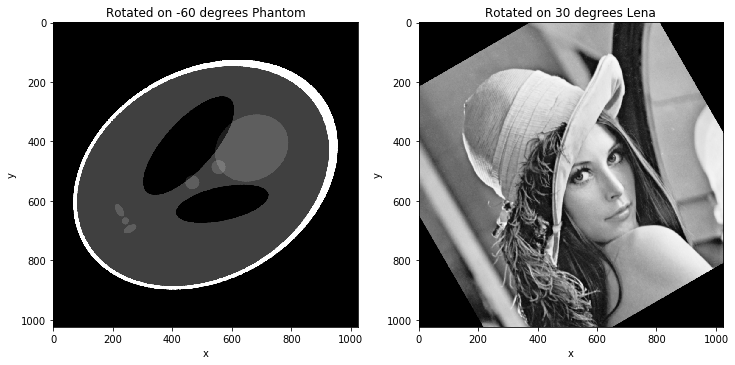

In [6]:
# we will need to rotate the images to observe them from different angles

# there are examples of rotations in code below

plt.figure(figsize=(12,6))
  
phantom_angle = -60
lena_angle = +30

for i in range(num_images):
    plt.subplot(1, 2, i+1)
    if i == 0:
        # rotate 'phantom' image on 60 degrees clockwise (-60 degrees)
        rotated_im = rotate(list_of_images[i], -60)
        assert rotated_im.shape == (N, N)

        plt.imshow(rotated_im, cmap=plt.cm.Greys_r)
        plt.title('Rotated on {} degrees Phantom'.format(phantom_angle))
        plt.xlabel('x')
        plt.ylabel('y')

    elif i == 1:
        # rotate 'Lena' on +30 degrees
        rotated_im = rotate(list_of_images[i], +30)
        assert rotated_im.shape == (N, N)

        plt.imshow(rotated_im, cmap=plt.cm.Greys_r)
        plt.title('Rotated on {} degrees Lena'.format(lena_angle))
        plt.xlabel('x')
        plt.ylabel('y')

plt.show()

In [7]:
# observation angles discretization parameter - number of observation angles
# each angle = (180 degrees) / (num_of_angles)

num_of_angles = 90 # rotate on 2 degree each time


def radon(image, num_of_angles):

    angles = np.linspace(0, 180, num_of_angles)
    assert image.shape[0] == N # size of matrix dimension (1024)
    assert image.shape[0] == image.shape[1] # square matrix

    sinogram = np.zeros((N, len(angles)))

    for n, alpha in enumerate(angles):
        rotated_im = rotate(image, -alpha) # clockwise, but it doesn't matter
        sinogram[:, n] = np.sum(rotated_im, axis=0)

    return sinogram


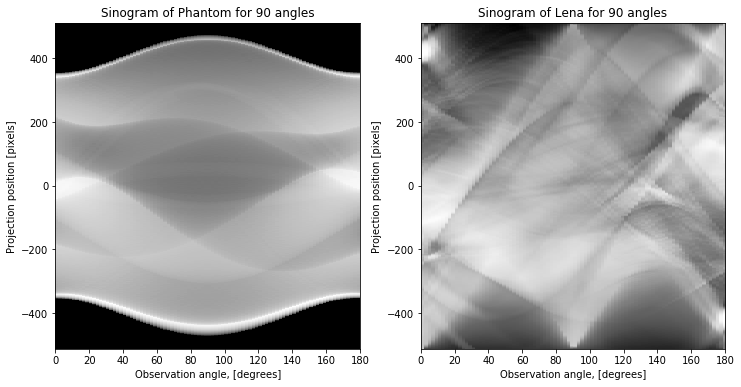

In [8]:
# obtain sinograms for the downloaded images

plt.figure(figsize=(12,6))

# list of sinograms for each picture (out of 2)
list_of_sinograms = list()

for i in range(num_images):
    # create set of subplots
    plt.subplot(1, 2, i+1)

    # rotated_im = rotate(list_of_images[k], -60)
    # plt.imshow(rotated_im, cmap=plt.cm.Greys_r)

    sinogram = radon(list_of_images[i], num_of_angles)
    list_of_sinograms.append(sinogram)

    plt.imshow( sinogram,
                cmap=plt.cm.Greys_r,
                aspect='auto', # If ‘auto’, changes the image aspect ratio to match that of the axes. (коэффициент сжатия)
                extent=[0, 180, (-N)/2, N/2]  # If extent is not None, the axes aspect ratio is changed to match that of the extent.
              )
    if i == 0:
        plt.title('Sinogram of Phantom for {} angles'.format(num_of_angles))
        plt.xlabel('Observation angle, [degrees]')
        plt.ylabel('Projection position [pixels]')
    elif i == 1:
        plt.title('Sinogram of Lena for {} angles'.format(num_of_angles))
        plt.xlabel('Observation angle, [degrees]')
        plt.ylabel('Projection position [pixels]')

plt.show()

```Here explanations of results of sinograms and summary about their resolution```

```Here implementation and explonation for Fourier Slice Theorem```

$$$$
$$$$
$$$$
$$$$
## Approach 1: image reconstruction via Fourier Slice theorem

*Projection Slice Theorem *(Cramér, H., Wold, H., 1936) 

Given a real-valued function f defined on the plane, then
$$\widehat{R_\alpha f}(\sigma)=\widehat{f}(\sigma \begin{pmatrix} \cos\alpha \\ \sin \alpha\end{pmatrix}),$$

![The projection slice theorem ](slice8.png)

The projection slice theorem provides a new way of reconstructing the function f from its
Radon transform, often called direct Fourier method :
1. take one dimensional Fourier transforms of the given Radon transform $R_{\alpha}f (\sigma)$, for a
(hopefully large) number of angles $\alpha$.
2. take the inverse two dimensional Fourier transform of the above result.
 
Unfortunately from equation of projection slice theorem, we will be able to reconstruct $\widehat{f}$ only on radial lines $\sigma \begin{pmatrix} \cos\alpha \\ \sin \alpha\end{pmatrix}, \sigma ∈ R$. As we have only limited data (e.g., angle steps) $\widehat{f}$ will be very inaccurate far from the origin, resulting in reconstruction errors for high frequencies.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import scipy.interpolate
import scipy.fftpack
import scipy.misc
import scipy.ndimage.interpolation
import skimage.transform

lena = plt.imread('/Users/drew/Desktop/lena.png')

S=1024 # Size of target, and resolution of Fourier space
N=720 # Number of sinogram exposures (odd number avoids redundant direct opposites)

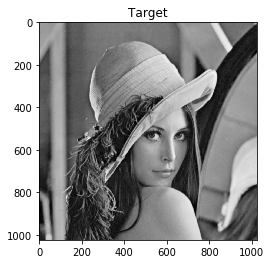

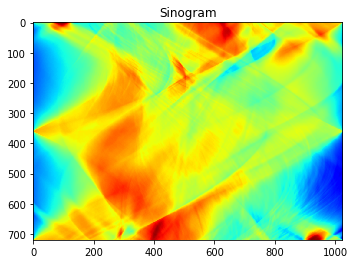

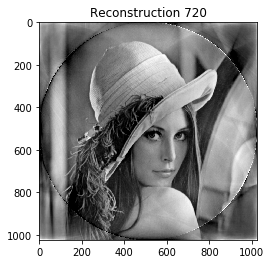

In [4]:
# Return the angle of the i-th (of 0-to-N-1) sinogram exposure in radians.
def angle(i): 
    radian = (np.pi*i)/N
    degree = np.rad2deg(radian)
    return radian, degree

lena=skimage.transform.resize(lena,(S,S),mode='constant')

plt.figure()
plt.title("Target")
plt.imshow(lena)
plt.gray()

# Calculate radon transform, (we can use Vanya's function instead of this)
sinogram = []
for i in range(N):
    ss = scipy.ndimage.interpolation.rotate(lena,angle(i)[1], order=3, reshape=False, mode='constant', cval=0.0)
    sinogram.append (np.sum(ss, axis=0))  
sinogram = np.array(sinogram)


plt.figure()
plt.title("Sinogram")
plt.imshow(sinogram)
plt.jet()

#Fourier transform the rows of the sinogram shift is needed to make the Fourier series symetric
sinogram_fft_rows=scipy.fftpack.fftshift(scipy.fftpack.fft(scipy.fftpack.ifftshift(sinogram,axes=1)),axes=1)

# Coordinates of sinogram FFT-ed rows' samples in 2D FFT space
a=np.array([angle(i)[0] for i in range(N)])
r=np.arange(S)-S/2
r,a=np.meshgrid(r,a)
r=r.flatten()
a=a.flatten()
srcx=(S/2)+r*np.cos(a)
srcy=(S/2)+r*np.sin(a)

# Coordinates of regular grid in 2D FFT space
dstx,dsty=np.meshgrid(np.arange(S),np.arange(S))
dstx=dstx.flatten()
dsty=dsty.flatten()

# Let the central slice theorem work its magic!
# Interpolate the 2D Fourier space grid from the transformed sinogram rows
fft2=scipy.interpolate.griddata(
    (srcy,srcx),#points
    sinogram_fft_rows.flatten(),#values
    (dsty,dstx),#meshgrid
    method='cubic',
    fill_value=0.0
    ).reshape((S,S))


# Transform from 2D Fourier space back to a reconstruction of the target
recon=np.real(scipy.fftpack.fftshift(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(fft2))))


plt.figure()
plt.title("Reconstruction %s"%N)
plt.imshow(recon,vmin=0.0,vmax=1.0)
plt.gray()

plt.show()

$$$$
$$$$
$$$$
$$$$
## Approach 2: image reconstruction via Dual Radon transform

This is more convenient (easier for implementation) way for reconsruction (so calles backprojection), but in oppse to the previous one, obtained picture very blurred. Hense, we should apply a filter to obtain acceptable reconstruction. 

### Dual radon transform

Denote **Dual Radon Transform** operator as       $\quad \hat{R}^*: \quad g(\Sigma \rightarrow \mathbb{R}) \quad \longrightarrow \quad f(\mathbb{R}^2 \rightarrow \mathbb{R}^2)$

* Here $\Sigma$ denotes set of lines, one along each vector (beam) $\mathbf x$

* $L(\mathbf x)$ - line along direction $\mathbf x$

* $L(\mathbf x, \alpha)$ - line along $\mathbf x$, making angle $\alpha$ with axes $y$

Dual Radon Transform **by definition:**

$$\fbox{$\hat{R}^* g(\mathbf x) = \int_{L(\mathbf x)} g(L(\mathbf x)) d L(\mathbf x) = \frac{1}{\pi} \int_0^{\pi} g(L(\mathbf x, \alpha)) d \alpha$}$$

**Why it's so called "Dual"?**

* def: **Inner product in $L^2$ space:**

$$\langle f_1(x, y), f_2(x, y)\rangle_{L^2(\mathbb{R}^2)} = \int_{\mathbb{R}} \int_{\mathbb{R}} f_1(x, y)f_2(x, y)dxdy $$

$$\langle g_1(s, \alpha), g_2(s, \alpha)\rangle_{L^2(\Sigma)} = \frac{1}{\pi}\int_{\mathbb{R}} \int_{0}^{\pi} g_1(s, \alpha)g_2(s, \alpha) d \alpha ds$$

$$\langle f(x, y), (\hat{R}^*g)(x, y)\rangle_{L^2(\mathbb{R}^2)} = $$

by definition of inner product

$$ =
\int_{\mathbb{R}} \int_{\mathbb{R}} f(x, y)\cdot(\hat{R}^*g)(x, y)dxdy = 
$$

by definition of Dual Radon Transform

$$
 = \int_{\mathbb{R}} \int_{\mathbb{R}} f(x, y)\cdot \left( \frac{1}{\pi} \int_0^{\pi} g(L(x, y, \alpha)) d \alpha \right) dxdy = 
$$

let's exchange the coords:
$\begin{cases}
x = z\sin \alpha + s \cos \alpha \\
y = -z \cos \alpha + s \sin \alpha
\end{cases}$


$$ = 
\frac{1}{\pi} \int_{\mathbb{R}} \int_{\mathbb{R}} \int_0^{\pi} f\begin{pmatrix} z\sin \alpha + s \cos \alpha \\ -z \cos \alpha + s \sin \alpha \end{pmatrix} \cdot g(s, \alpha) d \alpha dsdz = 
$$

go back to Direct Radon Transform notation

$$ = 
\int_{\mathbb{R}} \left( \frac{1}{\pi} \int_0^{\pi} \left( \int_{\mathbb{R}} f(z, s, \alpha) dz \right) \cdot g(s, \alpha) d \alpha \right) ds = 
\langle (\hat{R}f)(s, \alpha), g(s, \alpha)\rangle_{L^2(\Sigma)}
$$

$$
\fbox{$\langle f(x, y), (\hat{R}^*g)(x, y)\rangle_{L^2(\mathbb{R}^2)} = \langle (\hat{R}f)(s, \alpha), g(s, \alpha)\rangle_{L^2(\Sigma)}$}
$$

**Algorithm for image reconstruction:**

$$
\begin{align*}
\hat{R}^*(\hat{R}f(x,y))&=\frac{1}{\pi}\int_{0}^{\pi}\int_{-\infty}^\infty  f\begin{pmatrix}x+z\sin\alpha \\ y-z\cos\alpha \end{pmatrix} dz d\alpha \\
& = \frac{1}{\pi}\int_{0}^{2\pi}\int_{0}^\infty  f\begin{pmatrix}x-x_1 \\ y-y_1 \end{pmatrix} \frac{1}{r} r dr d\alpha =  \\
\end{align*}
$$

polar coords:
$\begin{cases}
x_1 = -z \sin \alpha \\
y_1 = z \cos \alpha
\end{cases}$, Jacobian $|J| = r$

$$
\begin{align*}
& = \frac{1}{\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}  f\begin{pmatrix}x-x_1 \\ y-y_1 \end{pmatrix}\frac{1}{\sqrt{x_1^2+y_1^2}} dx_1dy_1 = (f*g)(x,y),
\end{align*}
$$

It's convolution by its definition, where $g(x, y) = \frac{1}{\pi \sqrt{x_1^2+y_1^2}}$:

$$\fbox{$
\hat{R}^*(\hat{R}f(x,y)) = (f*g)(x,y)$}
$$



### Implementation

In [9]:
# INPUT: sinogram - (shape == image_resolution x number_of_observ._angles = 1024 x 90)
#OUTPUT: image - (shape == 1024 x 1024)

def iradon_dual(sinogram):
    # I didn't rescale image gradient of color here
    assert sinogram.shape[0] == N
    assert sinogram.shape[1] == num_of_angles

    # 'axes' for image
    x = np.arange(N)

    # the origin in the center of an image
    X, XT = np.meshgrid( (x - (N/2)), -(x - (N/2)) )

    image = np.zeros((N, N))
    # sinogram.shape[1] == num_of_angles
    angles = np.linspace(0, np.pi, sinogram.shape[1], endpoint=False)

    for n, alpha in enumerate(angles):
        # rotate image to obtain the current projection
        slice = X * np.cos(alpha) + XT * np.sin(alpha)

        # let's reduce values of S+(1/2)*N to the interval [0, 1023]: if a > 1023 -> a:=1023; if a <= 0 -> a:=0
        slice = np.clip(a=slice+(N/2), a_min=0, a_max=N-1, out=None)

        # we will use 'slice' as indeces, so it should be consisted of integers
        slice = slice.astype(int)

        # reconstruct image slicewise
        image += sinogram[slice, n]

    image = image / len(angles)
    assert image.shape == (N, N)
    
    return image

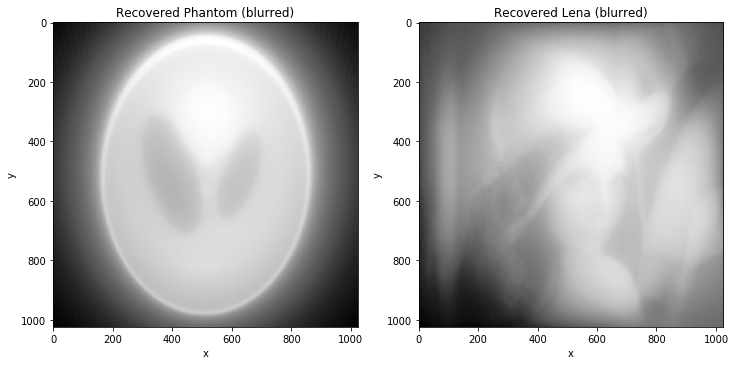

In [10]:
plt.figure(figsize=(12, 6))
list_of_recovered_im = list()

for i in range(num_images):
    plt.subplot(1, 2, i+1)
    recovered_im = iradon_dual(list_of_sinograms[i])
    list_of_recovered_im.append(recovered_im)

    plt.imshow(recovered_im, cmap=plt.cm.Greys_r)
    if i == 0:
        plt.title('Recovered Phantom (blurred)')
        plt.xlabel('x')
        plt.ylabel('y')
    elif i == 1:
        plt.title('Recovered Lena (blurred)')
        plt.xlabel('x')
        plt.ylabel('y')

plt.show()

Here's obvious problem - obtained images are very blurred. There's a known fact, that **blur** has **low frequency nature**. Some intuition, based on this fact, leads for the most obvious way - cut-off low frequency components, i.e. apply **high-pass filter** for the images. But there's more common and convenient way for reconstruction without blur - **Hilbert Transform**.

### Hilbert transform

Let $s(t)$ be a signal.

**Orthogonal signal:** $s_{ort}(t)$ - orthogonal complement for $s(t)$ if:
    $$
    \int_{-\infty}^{+\infty} s(t) \cdot s_{ort}(t) dt = 0
    $$

**Hilbert transform:** - allow us to compute orthogonal complement $s_{ort}(t):$

$$
s_{ort}(t) = \int_{-\infty}^{+\infty} \frac{s(\tau)}{\pi (t - \tau)} d\tau =
$$

Denote $h(t) = \frac{1}{\pi t}$

$$ = 
\int_{-\infty}^{+\infty} s(t)\cdot h(t - \tau) d \tau = s(t) * h(t) \tag{0}
$$

It's convolution of signal $s(t)$ with so called "Hilbert kernel" - window function.

**Relation with Fourier Transform:**

$$
\hat{F} \hat{H} (s(t)) = i \cdot sign(t) \cdot \hat{F}( s(t)) \tag{1}
$$

**Reconstruction without blurring:**

* $g = g(s, \alpha): \quad \Sigma \rightarrow \mathbb{R}$ - sinogram
* $\hat{H}_s$ - hilbert operator with respect to the variable $s$
### Main Theorem:

Image can be reconstructed in the folloeing way:

$$\fbox{$
\frac{1}{2} \hat{R}^* \hat{H}_s \frac{d}{ds}\left( \hat{R} f(x, y) \right) = f(x, y)$}
$$

**Proof:**

It's enough to check feasibility:

* $\forall f(x, y), g(s, \alpha): \quad \mathbb{R}^2 \rightarrow \mathbb{R}$ is satisfied

$$
\langle \frac{1}{2} \hat{R}^* \hat{H}_s \frac{d}{ds} \hat{R} f(x, y), g(s, \alpha) \rangle_{L^2(\mathbb{R}^2)} = \langle f(x, y), g(s, \alpha) \rangle_{L^2(\mathbb{R}^2)}
$$

Let's represent the right-hand side as follow:

$$
\langle \frac{1}{2} \hat{R}^* \hat{H}_s \frac{d}{ds} \hat{R} f(x, y), g(s, \alpha) \rangle = 
$$

Duality relation: $\langle f(x, y), (\hat{R}^*g)(x, y)\rangle_{L^2(\mathbb{R}^2)} = \langle (\hat{R}f)(s, \alpha), g(s, \alpha)\rangle_{L^2(\Sigma)}$

$$ = 
\langle \frac{1}{2} \hat{H}_s \frac{d}{ds} \hat{R} f(x, y), \hat{R}g(s, \alpha)\rangle = 
$$

Definition of inner product in $L^2$ lin. space: $\langle g_1(s, \alpha), g_2(s, \alpha)\rangle_{L^2(\Sigma)} = \frac{1}{\pi}\int_{\mathbb{R}} \int_{0}^{\pi} g_1(s, \alpha)g_2(s, \alpha) d \alpha ds$

$$ = 
\frac{1}{2\pi} \int_0^{\pi} \left( \int_{\mathbb{R}} (\hat{H}_s \frac{d}{ds} \hat{R}f)(s)  \cdot (\hat{R}g)(s) ds  \right) d \alpha = 
$$

Conversion to Fourier domain

$$ = 
\frac{1}{4\pi^2} \int_0^{\pi}  \int_{\mathbb{R}} \left( \hat{F} \hat{H}_s \frac{d}{ds} \hat{R}_{\alpha}f \right)(\sigma) \cdot \overline{\left( \hat{F} \hat{R}_{\alpha} g\right)(\sigma)} d \sigma d \alpha = 
$$

Here, relation between Fourier and Hilbert transform: $ \hat{F} \hat{H} f(t) = \hat{F} f(t) \cdot i \cdot sign(t)$


$$ = 
\frac{1}{4\pi^2} \int_0^{\pi}  \int_{\mathbb{R}} |\sigma |\cdot \left( \hat{F} \hat{R}_{\alpha}f \right)(\sigma) \cdot \overline{\left( \hat{F} \hat{R}_{\alpha} g \right)(\sigma)} d \sigma d \alpha = 
$$

Fourier Slice Theorem: $\hat{F} \hat{R}_{\alpha} (\sigma) = \hat{F} f(\sigma \cdot \mathbf n(\alpha))$


$$ = 
\frac{1}{4\pi^2} \int_0^{\pi}  \int_{\mathbb{R}} |\sigma |\cdot \left(\hat{F}f \right)(\sigma \cdot \mathbf n(\alpha)) \cdot \overline{\left(\hat{F}g \right)(\sigma \cdot \mathbf n(\alpha))} d \sigma d \alpha = 
$$

$$ = 
\frac{1}{4\pi^2} \int_0^{\pi}  \int_{\mathbb{R}} \left(\hat{F}f \right)(p, q) \cdot \overline{\left(\hat{F}g \right)(p, q)} d q d p = \langle f, g \rangle_{L^2(\mathbb{R}^2)}
$$
















Prooven theorem gives **exactly algorithm for implementation**. It looks as follow: in the formula above, operators act on ```sinogram``` function $\hat{R} f(x, y)$ one by one. The functions, implemented below - exactly those operators (in the corresponding order).

Differentiation operator:

$$\frac{d}{ds}$$

In [11]:
# \hat (d/ds)
# differentiating sinogram g(s - distance between origin and the slice, a - angle) over s
def dif_sinogram_op(sinogram):
    differentiated_sinogram = np.zeros_like(sinogram)
    differentiated_sinogram[:-1] = sinogram[1:] - sinogram[:-1]
    differentiated_sinogram[-1]  = sinogram[-1] - sinogram[-2]
    return differentiated_sinogram

Hilbert transform operator 

$$\hat{H}_s$$

In [12]:
# \hat H_s
# hilbert operator w.r.t. s - distance from origin to each slice
def hilbert_op(sinogram):
    assert sinogram.shape[0] == N
    # operator H act on each projection position, that specifies by angle
    h = np.zeros((N-1, ))

    slice_ind_1 = np.int((N/2) - 1)
    slice_ind_2 = np.int(N/2)

    # we denote "Hilbert kernel" as h(t) = 1/(pi*t) -> h(t-tau) = 1/(pi*(t-tau))
    h[:slice_ind_1] = -1.0 * np.reciprocal(np.arange(start=((N/2) - 1), stop=0,     step=-1))
    h[slice_ind_2:] = +1.0 * np.reciprocal(np.arange(start=1,           stop=(N/2), step=+1))
    h = h * np.reciprocal(np.pi)

    filtered_sinogram = np.zeros_like(sinogram)
    for i in range(sinogram.shape[1]): # sinogram.shape[1] = num_of_angles (observations)
        filtered_sinogram[:, i] = np.convolve(a=sinogram[:, i], v=h, mode='same')
    return filtered_sinogram

Dual Radon transform operator (it uses function ```iraon_dual(sinogram)```, implemented above):

$$\frac{1}{2} \hat{R}^*$$

In [13]:
# (1/2) \hat R^*
# here we act on sinogram by operators, written above
def iradon_deblur(sinogram):
    differentiated_sinogram = dif_sinogram_op(sinogram)
    filtered_sinogram = hilbert_op(differentiated_sinogram)
    # function iradon_dual() means here backprojection operator2 slide:
    deblurred_im = iradon_dual(filtered_sinogram)
    deblurred_im = (1/2) * deblurred_im
    
    return deblurred_im

And, finally, filtered reconstruction:

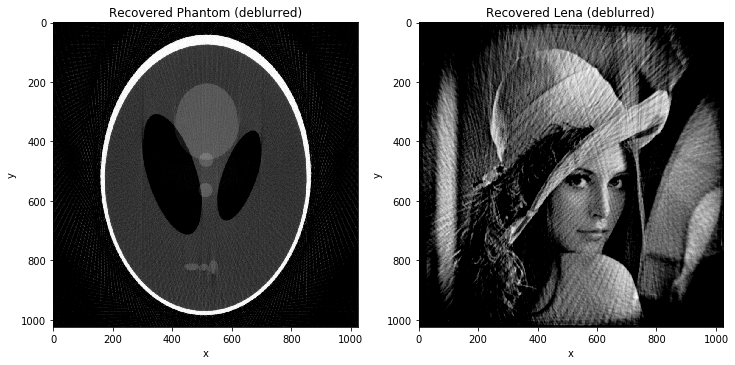

In [14]:
plt.figure(figsize=(12, 6))

list_of_deblurred_im = list()

for i in range(2):
    plt.subplot(1, 2, i+1)
    # reduce the values of image color to compare with the original, to the interval [0, 1] (the same as originals have)
    deblurred_im = np.clip(a=iradon_deblur(list_of_sinograms[i]),
                           a_min=0,
                           a_max=1)

    list_of_deblurred_im.append(deblurred_im)
    plt.imshow(deblurred_im, cmap=plt.cm.Greys_r)

    if i == 0:
        plt.title('Recovered Phantom (deblurred)')
        plt.xlabel('x')
        plt.ylabel('y')
    elif i == 1:
        plt.title('Recovered Lena (deblurred)')
        plt.xlabel('x')
        plt.ylabel('y')

plt.show()

**Acceptable reconstruction quality for piecewise-constant image (like Shepp-logam Phantom) can be obtained even 
with small number of observations**.

$$$$
$$$$
$$$$
$$$$
## Approach 3: Algebraic image reconstraction

This method is also known as Kaczmarz’s method – was originally developed to solve full-rank square problems $A x = b$. This problem is very sensetive to noise and that is why there are several types of filter (regularization) exist. They allow to restrinct different levels of the noise.

### Filters

Types of the regularization:

- 'Ram-Lak' - The cropped Ram-Lak or ramp filter (default). The frequency response of this filter is $| \omega |$. Because this filter is sensitive to noise in the projections, one of the filters listed below may be preferable. These filters multiply the Ram-Lak filter by a window that de-emphasizes high frequencies.
- 'Shepp-Logan' - The Shepp-Logan filter multiplies the Ram-Lak filter by a sinc function.
- 'Cosine' - The cosine filter multiplies the Ram-Lak filter by a cosine function.
- 'Hamming' - The Hamming filter multiplies the Ram-Lak filter by a Hamming window.
- 'Hann' - The Hann filter multiplies the Ram-Lak filter by a Hann window.

Their functions are shown below:

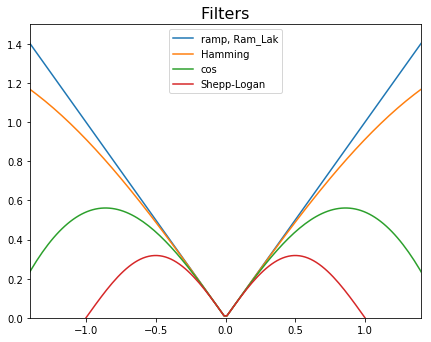

In [177]:
%matplotlib inline

n = 500
t = np.linspace(-5, 5, n)

window = np.hamming(n)
line_Ram_Lak = abs(t)
line_Hamming = window * line_Ram_Lak
line_Cosine = line_Ram_Lak*np.cos(t)
line_Shepp_Logan = np.sinc(t)*line_Ram_Lak

plt.figure(figsize=(7,5.4))
plt.title('Filters', size=16)
plt.axis([-1.4, 1.4, -0, 1.5])

plt.plot(t, line_Ram_Lak, label="ramp, Ram_Lak")
plt.plot(t, line_Hamming, label="Hamming")
plt.plot(t, line_Cosine,  label="cos")
plt.plot(t, line_Shepp_Logan, label='Shepp-Logan')
plt.legend(loc='upper center')

plt.show()
# plt.plot(t, abs(t), 'r--', t, line_Cosine, 'g-', t, line_Hamming, 'b-')

### Setting Up an Algebraic Model

Damping of $i$-th X-ray through domain:

$$
\int_{\text{ray}_{i}} \chi(s)dl = 0
$$

Where $\chi(\text{s})$ - attenuation coef.
Assume $\chi(s)$ is a constant $x_j$ in pixel j, leading to:

$$ b_i = \sum_{j} a_{ij}x_j$$


$a_{ij}$ = length of ray $i$ in pixel $j$:

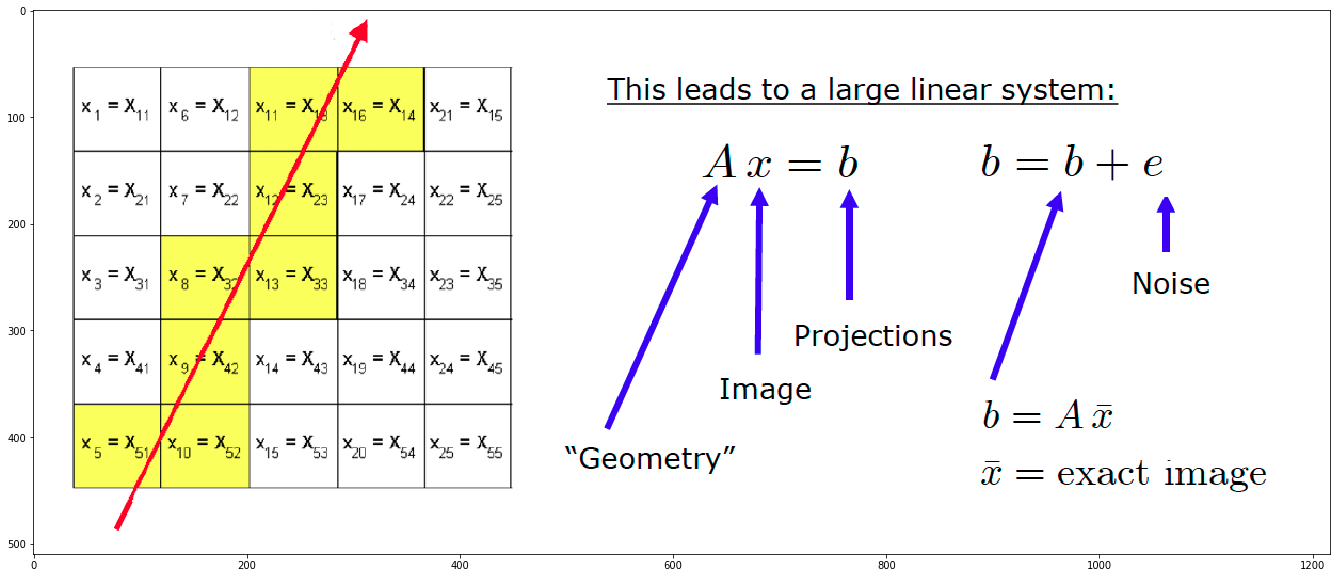

In [215]:
path = '/Users/drew/Desktop/'
linear_system = plt.imread(path + 'Linear system.png')
plt.figure(figsize=(38,10))
plt.imshow(linear_system)

### About the Coefficient Matrix, 3D Case

\begin{equation*}
\boxed
  {
         b_i = \sum_{j} a_{ij}x_j, \;\;\;\; a_{ij} = \text{length of the ray }i \text{ in voxel } j 
  }
\end{equation*}

To  compute the matrix element $a_ij$ we simply need to know the intersection of ray $i$ with voxel $j$. Let ray $i$ be given by the line

\begin{align}
\begin{pmatrix}
x \\
y \\
z \\
\end{pmatrix}
 = 
\begin{pmatrix}
x_0 \\
y_0 \\
z_0 \\
\end{pmatrix}
+ t
\begin{pmatrix}
\alpha \\
\beta \\
\gamma \\
\end{pmatrix}, \;\;\; t \in \mathbb{R}
\end{align}

The intersection with the plane $x=p$ is given by

\begin{align}
\begin{pmatrix}
y_j \\
z_j \\
\end{pmatrix}
 = 
\begin{pmatrix}
y_0 \\
z_0 \\
\end{pmatrix}
+ \frac{p - x_0}{\alpha}
\begin{pmatrix}
\beta \\
\gamma \\
\end{pmatrix}, \;\;\; p = 0, 1, 2, \dots
\end{align}

With similar equations for the planes $y=y_j$ and $z=z_j$. From these intersetions it is easy to compute the ray length in voxel $j$.

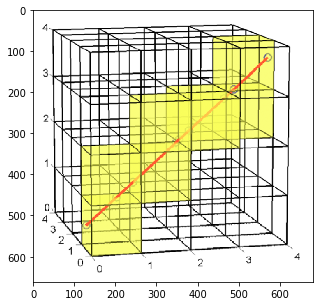

In [193]:
linear_system = plt.imread(path + '3D_case.png')
plt.figure(figsize=(40,5))
plt.imshow(linear_system)

$$$$
### The Coefficient Matrix is Very Sparse

Each ray intersects only a few cells, hence $A$ is very sparse. Many rows are structurally orthogonal, i.e., the zero/nonzero structure is such that their inner product is zero (they are orthogonal). This sparsity plays a role in the convergence and the success of some of the iterative methods.

With enough rays, the problem has a unique solution. And it take a place the least squares solution:

$$x_{\text{LSQ}} = A^{\dagger}b$$

The “difficulties” associated with the discretized tomography problem are closely linked with properties of the matrix A:

• The sensitivity of the solution x to data errors is characterized by cond(A), the condition number of A, defined as cond($A$) = || A || · || $ A^{-1} $||.

• Uniqueness of the solution x is characterized by rank(A), the rank of the matrix A (the number of linearly independent rows or columns).

### Algebraic Reconstruction Method (ART)

ART – also known as **Kaczmarz’s method** – was originally developed to solve full-rank square problems $A x = b$.

ART has fast initial convergence, and for certain tomo problems is has been the method of choice.

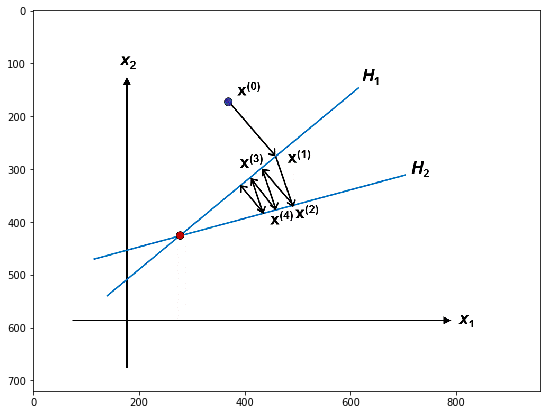

In [200]:
kaczmarz = plt.imread(path + 'kaczmarz-method1.gif')
plt.figure(figsize=(10,7))
plt.imshow(kaczmarz)

for k = 1, 2, 3, ... 

$$i = k \; \text{mod} \; \text{(number of rows)}$$

$$ x^{k+1} = x^k + \omega \frac{b_i - a_i^T x^k}{||a_i||^2_2} \;\;\; a_i^{T} = i \text{th row of } A$$

After some iterations the method slows down – and at this time we are often “close enough” to the desired solution.

During the first iterations, the iterates $x^k$ capture "important" information in $b$, associated with the exact data $b=Ax$.

- In this phase, the iterates $x^k$ approach the exact solution $x$.

Atlaterstages, the iterates starts to capture undesired noise components.

- Now the iterates $x^k$ diverge from the exact solution and they approach the undesired least squares solution $x_{LSQ}$.

#### There is Illustration of Semi-Convergence below (with overdetermined pictures)

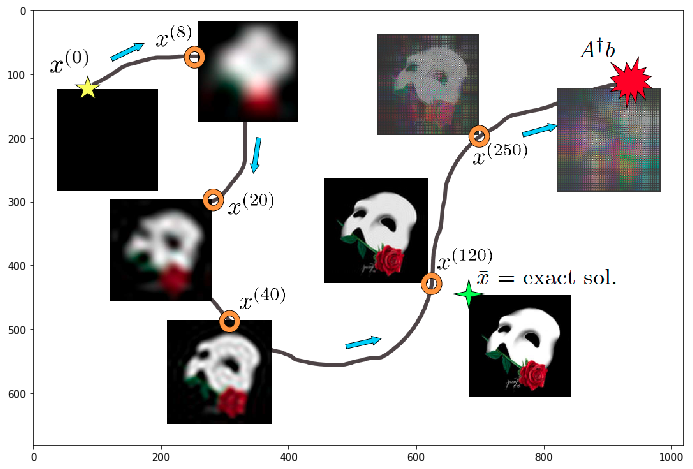

In [209]:
Illustration = plt.imread(path + 'Illustration of convergance.png')
plt.figure(figsize=(40,8))
plt.imshow(Illustration)

$$$$
$$$$
$$$$
To work with this algebraic method there is a build-in function in **```scikit-image```** library. Scikit-image is a collection of algorithms for image processing in Python. And its work based exactly on this principle.

To check its accuracy and perfomance we implemented handly written and described above function of Radon Transformation and got sinograms of pictures for chosen number of angles.
$$$$

In [24]:
import time
import skimage
from skimage.transform import iradon

%matplotlib inline

In [235]:
list_of_sinograms = []
num_of_angles = 720 

for i in range(num_images):
    sinogram = radon(list_of_images[i], num_of_angles)
    list_of_sinograms.append(sinogram)

$$$$

After that we did **Inverse Radon Transformation** of sinograms by build-in function ```skimage.transform.iradon```. It is worth mentioning that several types of filters for reconstructions are available: ```ramp, shepp-logan, cosine, hamming``` and ```hann```. We used default filter ```ramp``` here. It is the simplest filter  $|\omega|$ which we can get from the theory.

It applies the **Fourier Slice Theorem** to reconstruct an image by multiplying the frequency domain of the filter with the FFT of the projection data. This algorithm is called filtered back projection.

$$$$

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/radon_transform.py:204: UserWarning: The default of `circle` in `skimage.transform.iradon` will change to `True` in version 0.15.
  warn('The default of `circle` in `skimage.transform.iradon` '


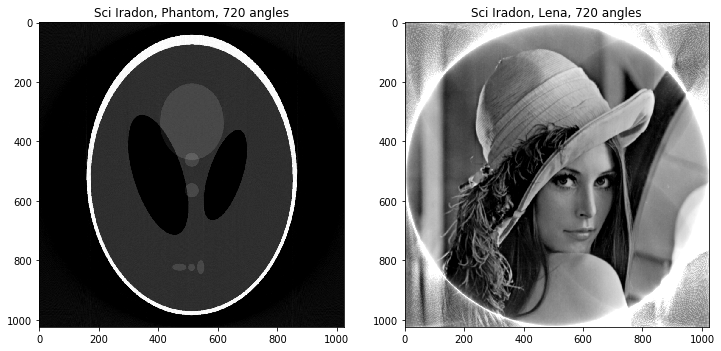

In [237]:
algebraic_recovered = []
pictures_name = ['Phantom','Lena']
times = []

plt.figure(figsize=(12, 6))
# num_of_angles = 90

for i in range (0, num_images):
    plt.subplot(1, 2, i+1)
    
    time_start = time.clock()
    algebraic_recovered.append(skimage.transform.iradon(list_of_sinograms[i], output_size=1024, filter='ramp'))
    time_end = time.clock()
    times.append(time_end - time_start)
    
    plt.title('Sci Iradon, {}, {} angles'.format(pictures_name[i], num_of_angles))
    plt.imshow(algebraic_recovered[i], vmin=0.0, vmax=1.0)
    plt.gray()

### The calculations of relative errors

Let us notice, that there are a lot of artifacts around the picture starting at some radius. It can be explained as a result of the lack of information in this area because of physics of the picture recording.

That is why we decided to add additional "restricted" norms: norms of the related error in the central part of the picture. It could be seen below that sometimes difference is pretty significant.

In [238]:
def norm(a):
    norms = []
    for i in range (num_images):
        norms.append(np.linalg.norm(list_of_images[i] - a[i]) / np.linalg.norm(list_of_images[i]))
    return (norms)


def norm_restr(a):
    h = (a[0].shape[0]) - 300
    norms_restr = []
    for i in range (num_images):
        short_original = list_of_images[i][300:h, 300:h]
        short_recovered = a[i][300:h, 300:h]
        norms_restr.append(np.linalg.norm(short_original - short_recovered) / np.linalg.norm(short_original))
    return (norms_restr)    
    

In [239]:
print (norm(algebraic_recovered))
print (norm_restr(algebraic_recovered))

[0.21424021994610273, 0.58401405559863717]
[0.13331178164832969, 0.24386980278079365]


## Comparison the relarive error of approaches

We chose the most important and interesting for comparison cases and below there is a table of results:

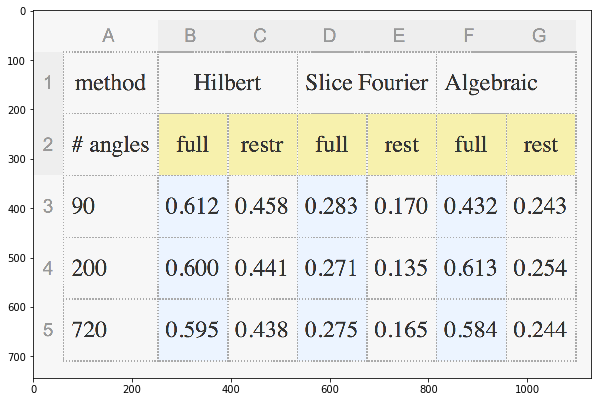

In [245]:
comparison = plt.imread(path + 'comparison.png')
plt.figure(figsize=(10,7))
plt.imshow(comparison)

Thus, we can see that the most accurate method is algebraic, but from theory we know that it demands to be handly tuned to the best result.

Also Slise Fourier Theorem has a good precision.

## Comparison the processing time of approaches

|    Angles (deg)  | Algebraic (sec) | Fourier (sec) | Hilbert (sec) |
| - |
| $$90$$ | $$14.00$$  | $$22.01$$  | $$16.63$$ |
| $$200$$  | $$14.76$$| $$24.83$$ | $$17.20$$ |

$$$$
$$$$
## Summary
$$$$
<big>

- Slice Fourier Theorem - good reconstruction, built-in filter (but quite slow)


- Dual Radon Transform - blurred image - Hilbert transform for deblurring - quite accurate reconstruction


- Algebraic approach - the fastest, very accurate, but should be manually adaptated